## GPS Data Plotting and Measurements

In [1]:
import ipynb.fs.full.helper as hp
# For reading the data
import pandas as pd
import os
import numpy as np
import math

# General plotting commands
from matplotlib.path import Path
import matplotlib.pyplot as plt

# pip install numpy --upgradea
import cartopy.crs as ccrs
from cartopy.io.img_tiles import Stamen
from cartopy.io.img_tiles import GoogleTiles

In [2]:
df = pd.read_hdf("~/data/DesertDataOct/Run02/Interpolated_0.h5") #load_GPS_directory_to_pandas('.')
df


,master_time,odor,trisonica_U,trisonica_V,lat,lon
0,1.603221e+09,0.634854,0.280000,1.160000,40.793749,-119.157556
1,1.603221e+09,0.635494,0.289993,1.160000,40.793749,-119.157556
2,1.603221e+09,0.635827,0.299985,1.160000,40.793749,-119.157556
3,1.603221e+09,0.635718,0.309978,1.160000,40.793749,-119.157556
4,1.603221e+09,0.635305,0.319970,1.160000,40.793749,-119.157556
...,...,...,...,...,...,...
59757,1.603221e+09,0.591438,1.333149,-1.755375,40.793697,-119.157631
59758,1.603221e+09,0.589259,1.496149,-1.733239,40.793697,-119.157631
59759,1.603221e+09,0.589552,1.331477,-1.796238,40.793697,-119.157631
59760,1.603221e+09,0.590273,1.110641,-1.873829,40.793697,-119.157631


Text(0, 0.5, 'Latitude')

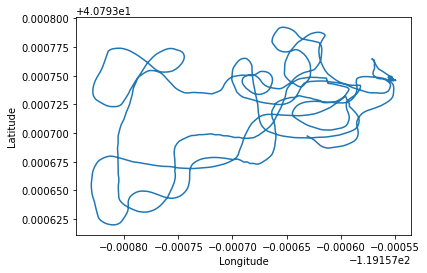

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(df.lon, df.lat)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


In [4]:
mean_latitude = df.lat.mean()
mean_longitude= df.lon.mean()
minValueLong = df.lon.min()
maxValueLong = df.lon.max()
minValueLat = df.lat.min()
maxValueLat = df.lat.max()
print("meanLatitude:%.6f" %mean_latitude)
print("meanLongitude:%.6f" %mean_longitude)
print("minvaluelong:%.6f" %minValueLong)
print("maxvaluelong:%.6f" %maxValueLong)
print("minvaluelat:%.6f" %minValueLat)
print("maxvaluelat:%.6f" %maxValueLat)

meanLatitude:40.793729
meanLongitude:-119.157649
minvaluelong:-119.157830
maxvaluelong:-119.157549
minvaluelat:40.793620
maxvaluelat:40.793792


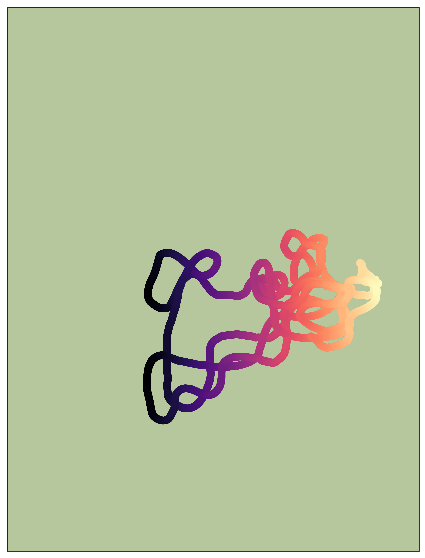

In [5]:
# Terrain Tiles from Stamen

# Define image tiles
tiler = Stamen('terrain')
mercator = tiler.crs

# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mercator)

# Define the GPS window
ax.set_extent([-119.1575, -119.1580, 40.7935, 40.7940],crs=ccrs.PlateCarree())

# Download images with resolution
resolution =12
ax.add_image(tiler, resolution)

# Plot the GPS tracks
ax.scatter(df.lon, df.lat, c= df.lon, cmap='magma', transform=ccrs.PlateCarree())

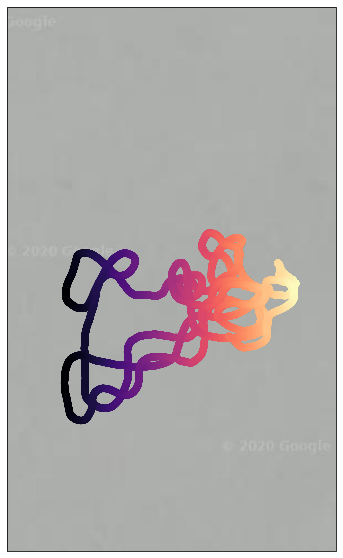

In [6]:
# Satellite Tiles from Google

# Define image tiles
tiler = GoogleTiles(style='satellite')
mercator = tiler.crs

# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mercator)

# Define the GPS window
ax.set_extent([-119.1575, -119.1579, 40.7935, 40.7940],crs=ccrs.PlateCarree())

# Download images with resolution
resolution = 20
ax.add_image(tiler, resolution)

# Plot the GPS tracks
ax.scatter(df.lon, df.lat, c= df.lon, cmap='magma', transform=ccrs.PlateCarree())

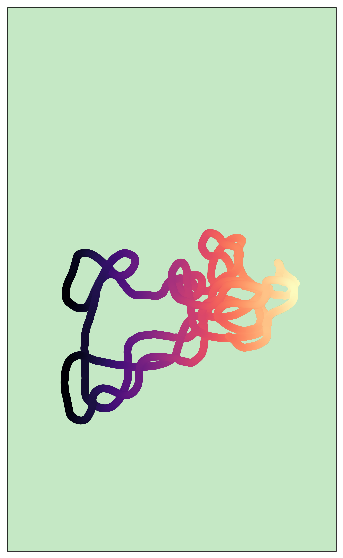

In [7]:
# Street Tiles from Google

# Define image tiles
tiler = GoogleTiles(style='street')
mercator = tiler.crs

# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mercator)

# Define the GPS window
ax.set_extent([-119.1575, -119.1579, 40.7935, 40.7940], crs=ccrs.PlateCarree())

# Download images with resolution
resolution = 20

ax.add_image(tiler, resolution)

# Plot the GPS tracks
ax.scatter(df.lon, df.lat, c= df.lon, cmap='magma', transform=ccrs.PlateCarree())

### Wind Station Positions

In [15]:
wind_data_fnames = [ '~/data/DesertDataOct/StationeryWind/20201020_19591_windy_a_data.hdf',
                     '~/data/DesertDataOct/StationeryWind/20201020_172919_windy_b_data.hdf', 
                     '~/data/DesertDataOct/StationeryWind/20201020_172458_windy_d_data.hdf',
                   '~/data/DesertDataOct/StationeryWind/20201020_17112_windy_e_data.hdf',
                   '~/data/DesertDataOct/StationeryWind/20201020_17327_windy_f_data.hdf',
                   '~/data/DesertDataOct/StationeryWind/20201020_171735_windy_g_data.hdf',
                   '~/data/DesertDataOct/StationeryWind/20201020_171353_windy_h_data.hdf',
                   '~/data/DesertDataOct/StationeryWind/20201020_172648_windy_i_data.hdf',]

In [16]:
wind_data = [pd.read_hdf(fname) for fname in wind_data_fnames]

In [18]:
#wind_data[0].lat.mean()

40.80886459350586

In [5]:
for i in [0,1,2,3,4,5,6,7]:
    wind_data[i].lat = np.median(wind_data[i].lat)
    wind_data[i].lon = np.median(wind_data[i].lon)

In [32]:
wind_data[2].lat

0         1000.000000
1         1000.000000
2         1000.000000
3         1000.000000
4         1000.000000
             ...     
242655      40.793976
242656      40.793976
242657      40.793976
242658      40.793976
242659      40.793976
Name: lat, Length: 242660, dtype: float32

In [33]:
lat_mean=[]
#choosing middle value of the column becaues of the inconsistent gps data from wind
for i in [0,1,2,3,4,5,6,7]:
    lat_mean.append(wind_data[i].lat[110165])
lat_mean

[40.793625,
 40.793556,
 40.793957,
 40.793762,
 40.794163,
 40.79397,
 40.79387,
 40.79371]

In [34]:
lon_mean = []
for i in [0,1,2,3,4,5,6,7]:
    lon_mean.append(wind_data[i].lon[110165])
lon_mean

[-119.15788,
 -119.15731,
 -119.157166,
 -119.1576,
 -119.15734,
 -119.15779,
 -119.15805,
 -119.15695]

In [46]:
lat_lon_df = pd.DataFrame()
lat_lon_df['lon'] = lat_mean
lat_lon_df['lat'] = lon_mean

In [66]:
lat_lon_df
lat_lon_df.to_hdf('~/data/DesertDataOct/StationeryWind/WindStationLocations.h5', key='lat_lon_df', mode='w')

### Plot Wind Station Location

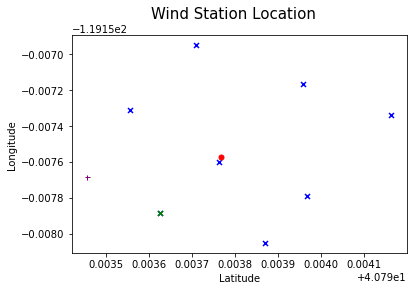

In [122]:
fig_wind_location = plt.figure()
fig_wind_location.suptitle("Wind Station Location", fontsize=15)
ax= fig_wind_location.add_subplot(111)
#ax.scatter(lat_mean, lon_mean, s=10, cmap='magma')
ax.scatter(lat_lon_df.lon, lat_lon_df.lat, marker ='x', s=25, color="blue")
ax.scatter(lat_lon_df.lon[0], lat_lon_df.lat[0], marker ='x', s=25, color="green")
ax.plot([40.79376709443614], [-119.15757512132207], marker='o', markersize=5, color="red")
ax.plot([40.793456213360020], [-119.15768269040078], marker='+', markersize=5, color="purple")
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
fig_wind_location.savefig('/home/flybot/odor_analysis/figure/windstationlocation.jpg')


### Measuring Distance

In [67]:
def calculate_dst(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 * 1000 # meters

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) **2 + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) **2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [68]:
#10cm
lat1 = 39.5394048; lat2 = 39.5394114; long1 = -119.8130651; long2 = -119.8130529
print( calculate_dst((lat1, long1), (lat2, long2)) )

1.2779171005367047


In [69]:
from geopy import distance

coords_1 = (39.5396558, -119.8123645)
coords_2 = (39.5396561,-119.8123642)

print (distance.distance(coords_1, coords_2).m)

0.042124771249924205


In [70]:
#5cm
lat1 = 39.5394067; lat2 = 39.5394074; long1 = -119.8130486; long2 = -119.8130529
print(calculate_dst((lat1, long1), (lat2, long2)) )

0.37685967028107026


In [71]:
#2cm
lat1 = 39.5394021; lat2 = 39.5394045; long1 = -119.813052; long2 = -119.8130529
print( calculate_dst((lat1, long1), (lat2, long2)) )

0.2778033568972474


In [72]:
#1cm
lat1 = 39.5393945; lat2 = 39.539392; long1 = -119.8130723; long2 = -119.8130765
print( calculate_dst((lat1, long1), (lat2, long2)) )

0.4549629571360745


In [73]:
from geopy import distance

coords_1 = (39.54644600, -119.81473767)
coords_2 = (39.54646483, -119.81476417)

print (distance.distance(coords_1, coords_2).m)

3.0918001715157133


In [74]:
lat1 = 39.54644600; lat2 = 39.54646483; long1 = -119.81473767; long2 = -119.81476417
print( calculate_dst((lat1, long1), (lat2, long2)) )

3.089804096509921


The great-circle distance or orthodromic distance is the shortest distance between two points on the surface of a sphere, measured along the surface of the sphere (as opposed to a straight line through the sphere's interior). The distance between two points in Euclidean space is the length of a straight line between them, but on the sphere there are no straight lines. In spaces with curvature, straight lines are replaced by geodesics. Geodesics on the sphere are circles on the sphere whose centers coincide with the center of the sphere, and are called great circles : https://en.wikipedia.org/wiki/Great-circle_distance

In [75]:
#12.7cm
from geopy import distance
coords_1 = (39.5396558, -119.8123645)
coords_2 = (39.5396561,-119.8123642)

print (distance.geodesic(coords_1, coords_2).meters)

0.042124771249924205


In [76]:
#2inches ; 5cm
from geopy import distance
coords_1 = (39.539656, -119.8123641)
coords_2 = (39.5396561, -119.8123645)

print (distance.geodesic(coords_1, coords_2).meters)

0.036133794195798374


In [77]:
#1 feet ; 0.3048 meters ; 30.48cm

from geopy import distance
coords_1 = (39.5396559, -119.8123646)
coords_2 = (39.5396561, -119.8123642)

print (distance.geodesic(coords_1, coords_2).meters*100)

4.093229635045674


In [78]:
#4 feet; 1.2192 meters ; 121.92
from geopy import distance
coords_1 = (39.5396561, -119.8123641)
coords_2 = (39.5396561, -119.8123643)

print (distance.geodesic(coords_1, coords_2).meters)

0.01719290415275028


In [79]:
#3 inches ; 0.0762 meters; 7.62cm

from geopy import distance
coords_1 = (39.5471637, -119.8156282)
coords_2 = (39.547164, -119.8156271)

print (distance.geodesic(coords_1, coords_2).meters)

0.10024599323183879


In [80]:
#5 inches; 0.127 meters; 12.7 cm

from geopy import distance
coords_1 = (39.547163, -119.8156307)
coords_2 = (39.5471638, -119.8156288)

print (distance.geodesic((39.547163, -119.8156307), coords_2).meters)

0.18590565457263297


In [81]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1- a)))
   return res*1000

In [82]:
haversine_distance(39.547163, -119.8156307, 39.5471638, -119.8156288)

0.18561536921625